In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Collection

In [ ]:
from google.colab import files
file = files.upload()  #upload file into google colab session

Saving dataset-of-00s.csv to dataset-of-00s.csv
Saving dataset-of-10s.csv to dataset-of-10s.csv
Saving dataset-of-60s.csv to dataset-of-60s.csv
Saving dataset-of-70s.csv to dataset-of-70s.csv
Saving dataset-of-80s.csv to dataset-of-80s.csv
Saving dataset-of-90s.csv to dataset-of-90s.csv


In [ ]:
df_00 = pd.read_csv("dataset-of-00s.csv") 
df_10 = pd.read_csv("dataset-of-10s.csv")
df_60 = pd.read_csv("dataset-of-60s.csv")
df_70 = pd.read_csv("dataset-of-70s.csv")
df_80 = pd.read_csv("dataset-of-80s.csv")
df_90 = pd.read_csv("dataset-of-90s.csv")
df = pd.concat([df_00, df_10, df_60, df_70, df_80, df_90])
df.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.578,0.471,4,-7.270,1,0.0289,0.368000,0.00000,0.159,0.532,133.061,196707,4,30.88059,13,1
1,On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.704,0.854,10,-5.477,0,0.1830,0.018500,0.00000,0.148,0.688,92.988,242587,4,41.51106,10,1
2,Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,0.162,0.836,9,-3.009,1,0.0473,0.000111,0.00457,0.174,0.300,86.964,338893,4,65.32887,13,0
3,"Heavy Metal, Raise Hell!",Zwartketterij,spotify:track:2IjBPp2vMeX7LggzRN3iSX,0.188,0.994,4,-3.745,1,0.1660,0.000007,0.07840,0.192,0.333,148.440,255667,4,58.59528,9,0
4,I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.630,0.764,2,-4.353,1,0.0275,0.363000,0.00000,0.125,0.631,112.098,193760,4,22.62384,10,1


# Preprocessing

Finding the number of rows and columns

In [ ]:
df.shape

(41106, 19)

Exploring data types and checking for nulls

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41106 entries, 0 to 5519
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             41106 non-null  object 
 1   artist            41106 non-null  object 
 2   uri               41106 non-null  object 
 3   danceability      41106 non-null  float64
 4   energy            41106 non-null  float64
 5   key               41106 non-null  int64  
 6   loudness          41106 non-null  float64
 7   mode              41106 non-null  int64  
 8   speechiness       41106 non-null  float64
 9   acousticness      41106 non-null  float64
 10  instrumentalness  41106 non-null  float64
 11  liveness          41106 non-null  float64
 12  valence           41106 non-null  float64
 13  tempo             41106 non-null  float64
 14  duration_ms       41106 non-null  int64  
 15  time_signature    41106 non-null  int64  
 16  chorus_hit        41106 non-null  float64

Checking for nulls again. Making doubly sure

In [ ]:
df.isnull().sum()

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64

We can see that there are no null values in the dataset. Taking the rough statistics of the data.

In [ ]:
df['time_signature'].describe()

count    41106.000000
mean         3.893689
std          0.423073
min          0.000000
25%          4.000000
50%          4.000000
75%          4.000000
max          5.000000
Name: time_signature, dtype: float64

In [ ]:
df = df.drop(axis=1, labels='time_signature')

In [ ]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

df_X = df.iloc[:,3:17]


df_scaled = scale.fit_transform(df_X)
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = df_X.columns
df_scaled

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,chorus_hit,sections
0,0.215416,-0.429668,-0.343315,0.555679,0.665030,-0.511673,0.011220,-0.508740,-0.245926,-0.039055,0.471597,-0.320853,-0.485415,0.518152
1,0.924004,1.086412,1.354030,0.893245,-1.503691,1.277886,-1.020031,-0.508740,-0.309525,0.544503,-0.905554,0.064804,0.073928,-0.097638
2,-2.124046,1.015160,1.071139,1.357892,0.665030,-0.297994,-1.074290,-0.493684,-0.159199,-0.906910,-1.112575,0.874330,1.327148,0.518152
3,-1.977830,1.640592,-0.343315,1.219326,0.665030,1.080465,-1.074596,-0.250443,-0.055127,-0.783465,1.000112,0.174751,0.972847,-0.302901
4,0.507849,0.730153,-0.909096,1.104859,0.665030,-0.527931,-0.003533,-0.508740,-0.442506,0.331280,-0.248819,-0.345625,-0.919860,-0.097638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41101,-0.808099,0.852864,1.071139,0.781602,-1.503691,1.870147,-1.071880,-0.508052,-0.112945,0.821319,1.154862,-1.284154,-0.513802,-0.918691
41102,0.457236,0.298684,1.071139,0.741877,-1.503691,-0.488447,-0.925315,-0.488116,-0.623476,0.551984,0.509605,-0.195220,-0.274186,-0.097638
41103,0.125437,-1.051141,1.354030,-0.939738,-1.503691,-0.501221,0.223667,-0.508704,-0.552360,0.106835,1.632688,-0.378684,-0.999112,-0.097638
41104,0.462860,0.797446,0.505358,0.779719,0.665030,-0.419930,-1.074320,1.978688,1.049193,-1.228615,0.024494,0.800023,0.369873,0.107625


In [ ]:
#Managing outliers
#creating boxplots to analyze the distribution of data and remove outliers

Text(0.5, 1.0, 'Distribution of predictors without outliers')

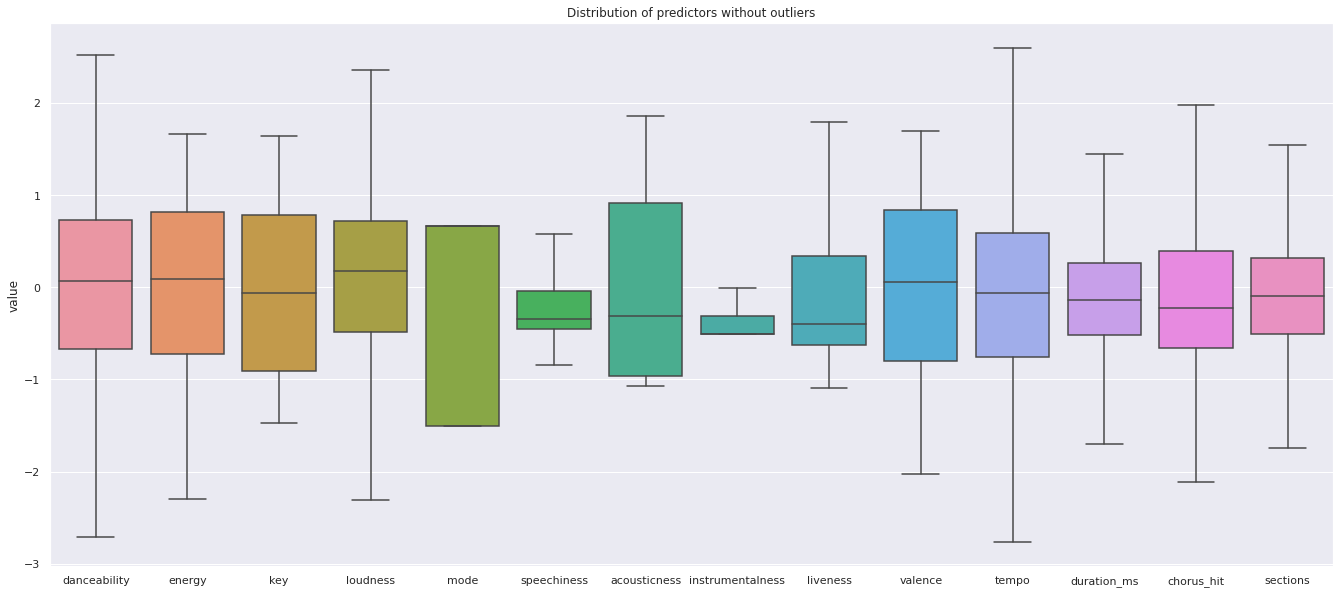

In [ ]:
df_melt=pd.melt(df_scaled)
df_melt
sns.set(rc={'figure.figsize':(23,10)})
sns.boxplot(x='variable', y='value', data=df_melt, showfliers=False)
plt.xlabel(None)
plt.title('Distribution of predictors without outliers')

Text(0.5, 1.0, 'Distribution of predictors with outliers')

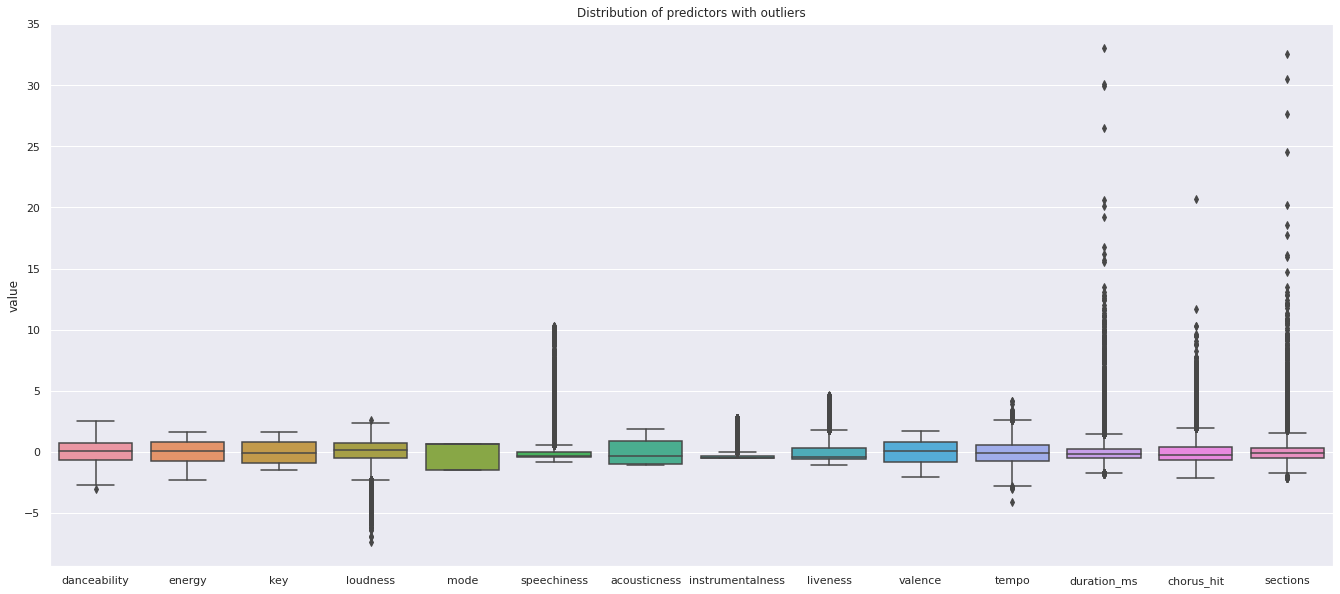

In [ ]:
df_melt=pd.melt(df_scaled)
df_melt
sns.set(rc={'figure.figsize':(23,10)})
sns.boxplot(x='variable', y='value', data=df_melt)
plt.xlabel(None)
plt.title('Distribution of predictors with outliers')

In [ ]:
df_clean= df_scaled
for col in df_clean.columns:
  q1=df_clean[col].quantile(0.25)
  q3=df_clean[col].quantile(0.75)
  inq=q3-q1
  filter=(df_clean[col] >= q1-1.5*inq) & (df_clean[col] <= q3+1.5*inq)
  df_clean[col] = df_clean[col].loc[filter]

In [ ]:
df_clean.isna().sum()


danceability           1
energy                 0
key                    0
loudness            1343
mode                   0
speechiness         5088
acousticness           0
instrumentalness    8920
liveness            2688
valence                0
tempo                434
duration_ms         1987
chorus_hit          1839
sections            1570
dtype: int64

In [ ]:
df_clean = df_clean.drop(axis=1, labels=['speechiness', 'instrumentalness'])

In [ ]:
df_remove = df_clean.dropna()
df_remove.shape

(33401, 12)

Text(0.5, 1.0, 'Distribution of predictors without outliers')

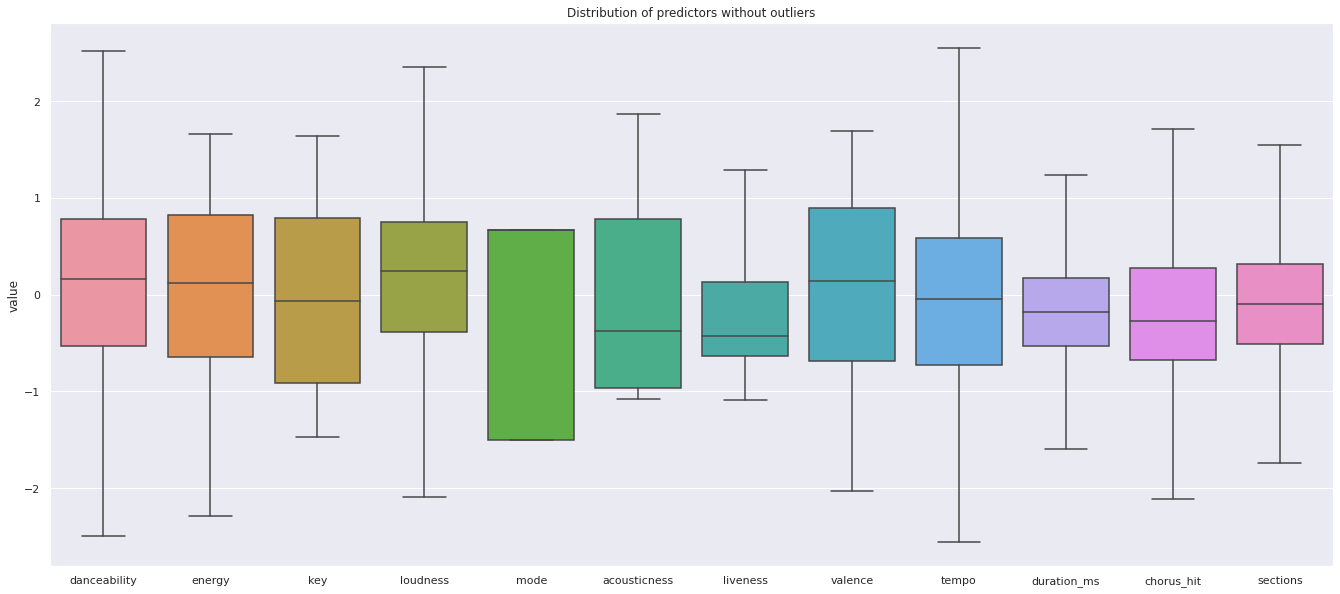

In [ ]:
df_melt=pd.melt(df_remove)
df_melt
sns.set(rc={'figure.figsize':(23,10)})
sns.boxplot(x='variable', y='value', data=df_melt, showfliers=False)
plt.xlabel(None)
plt.title('Distribution of predictors without outliers')

In [ ]:
df_merge = df.iloc[df_remove.index]

In [ ]:
df_merge = df_merge.drop(axis=1, labels=['speechiness', 'instrumentalness'])

In [ ]:
df_merge.columns

Index(['track', 'artist', 'uri', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'acousticness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'chorus_hit', 'sections', 'target'],
      dtype='object')

In [ ]:
df_merge.groupby('target')[['danceability', 'energy', 'key', 'loudness',
       'mode', 'acousticness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'chorus_hit', 'sections']].count()

,danceability,energy,key,loudness,mode,acousticness,liveness,valence,tempo,duration_ms,chorus_hit,sections
target,,,,,,,,,,,,
0,15247,15247,15247,15247,15247,15247,15247,15247,15247,15247,15247,15247
1,18154,18154,18154,18154,18154,18154,18154,18154,18154,18154,18154,18154


In [ ]:
sns.countplot(x='target', data=df_merge)
sns.set(rc={'figure.figsize':(12,8)})

In [ ]:
plt.rcParams["figure.figsize"] = [12, 15]
fig, axes = plt.subplots(nrows=3, ncols=4, )
df_merge.boxplot(column= 'danceability', by='target', ax=axes[0][0], showfliers=False)
df_merge.boxplot(column= 'energy', by='target', ax=axes[0][1], showfliers=False)
df_merge.boxplot(column='key', by='target', ax=axes[0][2], showfliers=False)
df_merge.boxplot(column='loudness', by='target', ax=axes[0][3], showfliers=False)
df_merge.boxplot(column='mode', by='target', ax=axes[1][0], showfliers=False)
df_merge.boxplot(column='acousticness', by='target', ax=axes[1][1], showfliers=False)
df_merge.boxplot(column='liveness', by='target', ax=axes[1][2], showfliers=False)
df_merge.boxplot(column='valence', by='target', ax=axes[1][3], showfliers=False)
df_merge.boxplot(column='tempo', by='target', ax=axes[2][0], showfliers=False)
df_merge.boxplot(column='duration_ms', by='target', ax=axes[2][1], showfliers=False)
df_merge.boxplot(column='chorus_hit', by='target', ax=axes[2][2], showfliers=False)
df_merge.boxplot(column='sections', by='target', ax=axes[2][3], showfliers=False)
plt.tight_layout()
plt.suptitle(None)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(11,11)) 
ax = sns.heatmap(df_remove.corr(), annot=True, cmap='RdBu').set(title='Predictors Correlation Heatmap')

In [ ]:
df_merge.iloc[:,3:15]

,danceability,energy,key,loudness,mode,acousticness,liveness,valence,tempo,duration_ms,chorus_hit,sections
0,0.578,0.471,4,-7.270,1,0.368000,0.1590,0.532,133.061,196707,30.88059,13
1,0.704,0.854,10,-5.477,0,0.018500,0.1480,0.688,92.988,242587,41.51106,10
2,0.162,0.836,9,-3.009,1,0.000111,0.1740,0.300,86.964,338893,65.32887,13
3,0.188,0.994,4,-3.745,1,0.000007,0.1920,0.333,148.440,255667,58.59528,9
4,0.630,0.764,2,-4.353,1,0.363000,0.1250,0.631,112.098,193760,22.62384,10
...,...,...,...,...,...,...,...,...,...,...,...,...
5515,0.396,0.795,9,-6.070,0,0.000928,0.1820,0.762,152.943,82107,30.34109,6
5516,0.621,0.655,9,-6.281,0,0.050600,0.0937,0.690,134.167,211653,34.89506,10
5517,0.562,0.314,10,-15.213,0,0.440000,0.1060,0.571,166.847,189827,21.11763,10
5518,0.622,0.781,7,-6.080,1,0.000101,0.3830,0.214,120.051,330053,47.13558,11


In [ ]:
#Scaling the final df
scale = StandardScaler()
scale_X = scale.fit_transform(df_merge.iloc[:,3:15])
df_merge.iloc[:,3:15] = scale_X

# Train Test Split

In [ ]:
X = df_merge.iloc[:,3:15]
X.shape

(33401, 12)

In [ ]:
y = df_merge['target']
y.shape

(33401,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

# Model Training

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [ ]:
models = {
    "                   Logistic Regression": LogisticRegression(),
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "   Support Vector Machine (RBF Kernel)": SVC(),
    "                        Neural Network": MLPClassifier(),
    "                         Random Forest": RandomForestClassifier(),
    "                     Gradient Boosting": GradientBoostingClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

                   Logistic Regression trained.
                   K-Nearest Neighbors trained.
                         Decision Tree trained.
Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


                        Neural Network trained.
                         Random Forest trained.
                     Gradient Boosting trained.


In [ ]:
for name, model in models.items():
    print(name + ": {:.2f}%".format(model.score(X_test, y_test) * 100))

                   Logistic Regression: 68.86%
                   K-Nearest Neighbors: 68.39%
                         Decision Tree: 65.05%
Support Vector Machine (Linear Kernel): 68.79%
   Support Vector Machine (RBF Kernel): 73.97%
                        Neural Network: 73.63%
                         Random Forest: 74.65%
                     Gradient Boosting: 73.32%


 Random Forest model with 73.78% has the highest score in the validation set

